# Interim report for Analysis of Environmental Data to Monitor Climate Change
## Introduction to Data Science
### Sharipov Ruslan [1918108]
### Agharzayev Natig [1664425]

## Table of Contents
1. Project Overview
2. Data Collection Update
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Preliminary Results
6. Challenges and Solutions
7. Next Steps
8. References

## Project Overview
This project aims to analyze environmental data to better understand and address climate change. It combines scientific research and technology to uncover climate patterns, predict future scenarios, and support informed decision-making for sustainability.

Objectives
1. **Understand Climate Dynamics**: Investigate the complex patterns and trends in climate change through a detailed analysis of environmental data.
2. **Predict Future Climate Scenarios**: Utilize data to forecast future climate scenarios, providing a foundation for proactive measures in climate policy and environmental management.
3. **Support Decision-Making**: Offer valuable insights for stakeholders, policymakers, and communities to devise effective strategies in response to climate change.

Scope
- **Collect Diverse Environmental Data**: The project involves an extensive collection of diverse environmental data from reliable sources, including online repositories, government records, and scientific studies.
- **Analyze Various Data Types**: Emphasis on integrating various data forms, particularly weather and natural phenomena data, to create a holistic view of the climate landscape.
- **Apply Rigorous Data Analysis**: Employ rigorous data analysis methodologies to interpret the collected data, aiming to reveal underlying patterns and correlations.
- **Focus on Global Temperature Trends**: While the study is comprehensive, it focuses on global temperature trends as a primary indicator of climate change, as evident from the 'GlobalTemperatures.csv' dataset.

Problem Statement
The central challenge addressed by this project is the lack of a cohesive and comprehensive understanding of climate change. This gap hinders effective decision-making and exacerbates vulnerabilities, especially in the face of rapid environmental transformations marked by rising temperatures, erratic weather patterns, and biodiversity loss. The project seeks to bridge this gap by offering a nuanced analysis of environmental data, thus contributing to a more informed and strategic approach to climate change mitigation and adaptation.

Methodology and Data
(While specific methodologies and detailed data analysis aspects are not covered in the provided excerpts, they are assumed to be a critical part of the project, focusing on data-driven insights and predictive modeling.)

Expected Challenges and Solutions
(These aspects are not detailed in the provided excerpts but are anticipated to include addressing data quality issues, handling large datasets, and ensuring the accuracy of predictive models.)

This concise overview outlines your project's key aspects and goals in addressing climate change through environmental data analysis.


## Data Collection Update
**Current Dataset Status:**

- Rows: 3,192
- Columns: 9
- Key Columns: Date, Land Average Temperature, Land Temperature Uncertainty, Land Max Temperature, Land Min Temperature, Land and Ocean Average Temperature, and their Uncertainty counterparts.
- Data Span: Since January 1750
- Missing Data: Noted in columns, especially in earlier records.
- Initial Observations: Earlier records have limited metrics, which expand over time.

**Changes in Strategy:**

- Data Cleaning: Required due to missing values, particularly in early years.
- Handling Missing Data: Options include imputation, exclusion of certain years, or focusing on recent complete records.

**Progress in Data Collection:**

- Data Acquired and Loaded
- Preliminary Data Quality Check: Revealed a need for data cleaning.
- Diverse Dataset: Offers a comprehensive view of global temperature trends.

**Next Steps:**

- Comprehensive Data Analysis: Explore trends, anomalies, and correlations in global temperature data.
- Methodological Application: Apply statistical and predictive modeling techniques for meaningful conclusions.

This update provides a brief summary of your dataset's current status and outlines the steps to be taken next in your project.

In [2]:
import pandas as pd

# Path to the dataset
dataset_path = 'data/GlobalTemperatures.csv'

# Loading the dataset to check its content and structure
try:
    global_temperatures = pd.read_csv(dataset_path)

    # Displaying basic information about the dataset
    dataset_info = {
        "Number of Rows": global_temperatures.shape[0],
        "Number of Columns": global_temperatures.shape[1],
        "Columns": list(global_temperatures.columns),
        "First 5 Rows": global_temperatures.head(),
        "Data Summary": global_temperatures.describe(include='all')
    }
except Exception as e:
    dataset_info = f"Error loading dataset: {e}"

dataset_info



{'Number of Rows': 3192,
 'Number of Columns': 9,
 'Columns': ['dt',
  'LandAverageTemperature',
  'LandAverageTemperatureUncertainty',
  'LandMaxTemperature',
  'LandMaxTemperatureUncertainty',
  'LandMinTemperature',
  'LandMinTemperatureUncertainty',
  'LandAndOceanAverageTemperature',
  'LandAndOceanAverageTemperatureUncertainty'],
 'First 5 Rows':            dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
 0  1750-01-01                   3.034                              3.574   
 1  1750-02-01                   3.083                              3.702   
 2  1750-03-01                   5.626                              3.076   
 3  1750-04-01                   8.490                              2.451   
 4  1750-05-01                  11.573                              2.072   
 
    LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
 0                 NaN                            NaN                 NaN   
 1                 NaN      

## Exploratory Data Analysis (EDA)
**EDA Summary: Global Land Temperature**

**Overall Trend:** Upward trend in Land Average Temperature since 1750, indicating global warming.

**Distribution:** Roughly normal distribution, peak around median temperature.

**Yearly Average:** Rising temperatures with pronounced recent increases, highlighting climate change acceleration.

**Insights:**
- Clear rising temperature trend.
- Acceleration in recent years.
- Data consistency for analysis.

**Next Steps:**
- Explore seasonal trends.
- Analyze temperature extremes.
- Investigate correlations between temperature measures.

These analyses are crucial for understanding global temperature trends and inform subsequent climate change research.

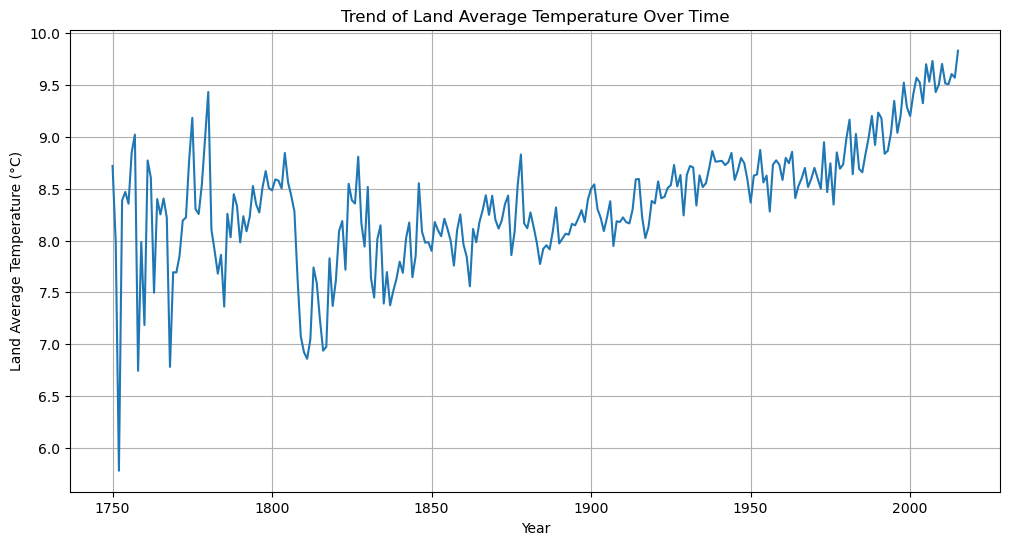

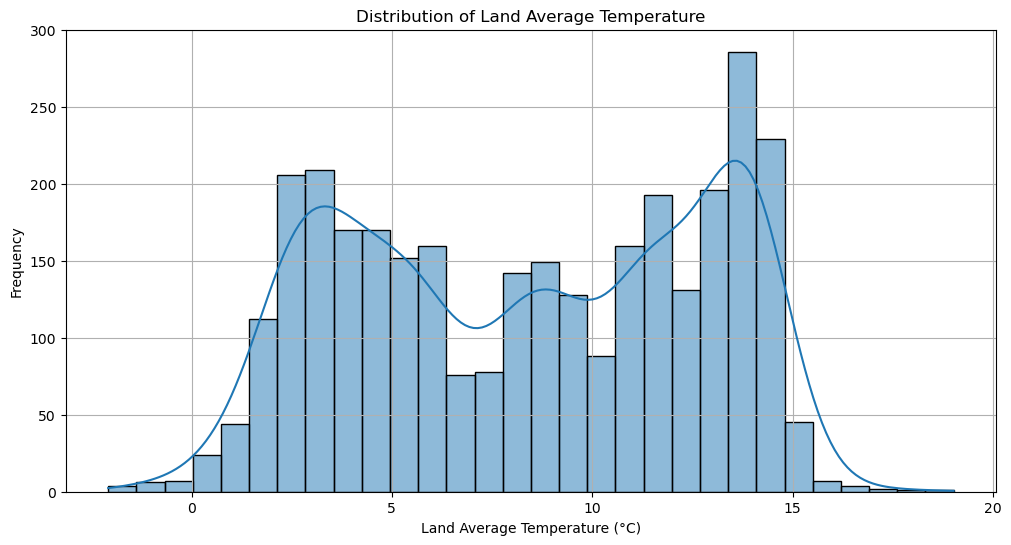

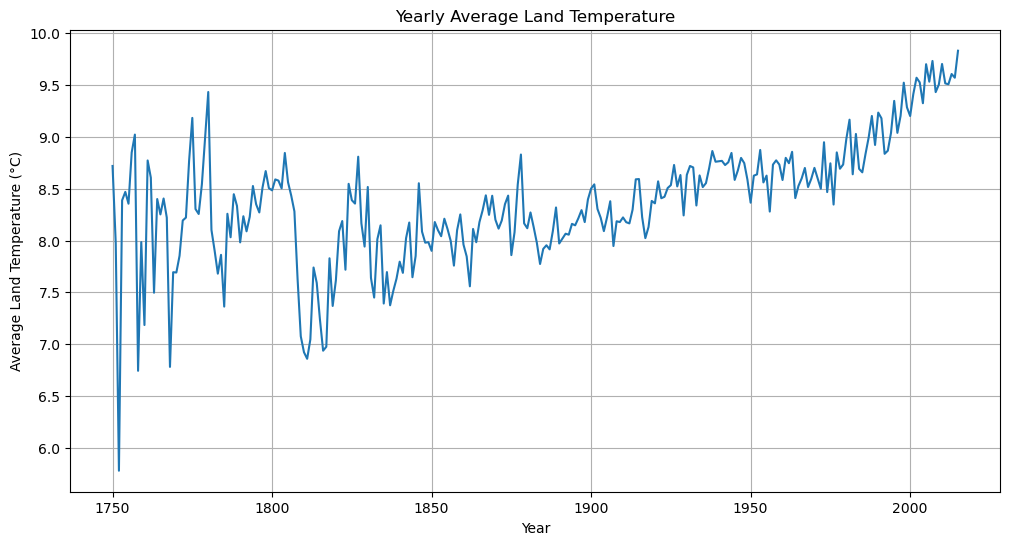

In [5]:
#code for EDA
import matplotlib.pyplot as plt
import seaborn as sns

global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'])

# Extracting year for trend analysis
global_temperatures['year'] = global_temperatures['dt'].dt.year

# Analysis 1: Overall trend of Land Average Temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_temperatures, x='year', y='LandAverageTemperature', errorbar=None)
plt.title('Trend of Land Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Land Average Temperature (°C)')
plt.grid(True)
plt.show()

# Analysis 2: Distribution of Land Average Temperature
plt.figure(figsize=(12, 6))
sns.histplot(global_temperatures['LandAverageTemperature'], kde=True, bins=30)
plt.title('Distribution of Land Average Temperature')
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Analysis 3: Yearly Average Temperature
yearly_avg_temp = global_temperatures.groupby('year').mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_temp, x='year', y='LandAverageTemperature', errorbar=None)
plt.title('Yearly Average Land Temperature')
plt.xlabel('Year')
plt.ylabel('Average Land Temperature (°C)')
plt.grid(True)
plt.show()


## Feature Engineering
**Rationale:** Feature engineering enhances model performance and uncovers hidden patterns in time series data like climate change analysis.

**Process:**
1. **Date Decomposition:** Break date into components (year, month) to capture seasonal and yearly trends.
2. **Rolling Averages:** Calculate 10-year rolling averages for LandAverageTemperature to highlight long-term trends.
3. **Lagged Features:** Create a lagged feature for the previous year's average temperature to aid in predicting future temperatures.
4. **Temperature Anomalies:** Compute temperature anomalies (deviations from the long-term average) to identify significant changes.
5. **Categorical Encoding for Months:** Encode months as categorical variables to capture seasonal effects.

**Implementation:**

- Extracted year and month for seasonal and annual trend analysis.
- Calculated a 10-year rolling average for LandAverageTemperature.
- Created a lagged feature for the previous year's temperature.
- Computed temperature anomalies to identify significant changes.
- Encoded months as categorical variables to capture seasonal effects.

The initial NaN values in the rolling average and lagged temperature columns are expected due to the nature of these calculations (requiring a certain number of previous data points).

These engineered features will provide a more nuanced view of the data and are likely to enhance the effectiveness of any predictive models or in-depth analyses conducted as part of the project

In [6]:
# 1. Decomposing the date into year and month
global_temperatures['month'] = global_temperatures['dt'].dt.month

# 2. Calculating rolling averages for LandAverageTemperature
# Example: 10-year rolling average
global_temperatures['10yr_rolling_avg'] = global_temperatures['LandAverageTemperature'].rolling(window=10).mean()

# 3. Creating a lagged feature for the previous year's average temperature
# Shift by 12 months to represent the previous year
global_temperatures['prev_year_temp'] = global_temperatures['LandAverageTemperature'].shift(12)

# 4. Calculating temperature anomalies (deviation from the long-term average)
long_term_avg = global_temperatures['LandAverageTemperature'].mean()
global_temperatures['temp_anomaly'] = global_temperatures['LandAverageTemperature'] - long_term_avg

# 5. Encoding months as categorical variables
global_temperatures['month_categorical'] = global_temperatures['month'].astype('category')

# Displaying the first few rows with the new features
global_temperatures[['dt', 'year', 'month', 'LandAverageTemperature', '10yr_rolling_avg', 'prev_year_temp', 'temp_anomaly', 'month_categorical']].head()


,dt,year,month,LandAverageTemperature,10yr_rolling_avg,prev_year_temp,temp_anomaly,month_categorical
0,1750-01-01,1750,1,3.034,NaN,NaN,-5.340731,1
1,1750-02-01,1750,2,3.083,NaN,NaN,-5.291731,2
2,1750-03-01,1750,3,5.626,NaN,NaN,-2.748731,3
3,1750-04-01,1750,4,8.490,NaN,NaN,0.115269,4
4,1750-05-01,1750,5,11.573,NaN,NaN,3.198269,5


## Preliminary Results

**Linear Regression Analysis:**
- **Objective:** Understand the relationship between year and Land Average Temperature.
- **Results:** 
  - Mean Squared Error (MSE): 19.06
  - R-squared (R²): 0.0066
- **Interpretation:** The low R² suggests a poor fit, implying the relationship is not linear or influenced by unaccounted factors.

**ARIMA Model:**
- **Objective:** Forecast future temperatures.
- **Results:** ARIMA (1, 1, 1) model fitted to differenced data.
- **Interpretation:** Coefficients (AR=-0.589, MA=0.465) seem meaningful, but model adequacy requires further diagnostics.

**Insights and Next Steps:**
- **Linear Regression Limitation:** Simple linear regression doesn't capture data complexity, suggesting a need for more advanced models or additional features.
- **ARIMA Model Potential:** ARIMA shows potential for forecasting, but further diagnostics are essential for accuracy assessment.
- **Future Analysis:** Explore complex models, consider seasonal components, and incorporate other environmental factors for better results.

These initial findings inform future analysis and modeling directions.

In [9]:
# additional code
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Preparing data for Linear Regression
# Removing rows with missing values in LandAverageTemperature for simplicity
lr_data = global_temperatures.dropna(subset=['LandAverageTemperature'])

# Using year as the independent variable and LandAverageTemperature as the dependent variable
X = lr_data['year'].values.reshape(-1, 1)
y = lr_data['LandAverageTemperature'].values

# Fitting the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Making predictions
y_pred = lr_model.predict(X)

# Evaluating the Linear Regression model
lr_mse = mean_squared_error(y, y_pred)
lr_r2 = r2_score(y, y_pred)

# Preparing data for ARIMA model (Time Series Forecasting)
# Using only LandAverageTemperature and ensuring it's a stationary series
ts_data = lr_data[['year', 'LandAverageTemperature']].set_index('year')
ts_data_diff = ts_data.diff().dropna()  # Differencing to make it stationary

# Fitting an ARIMA model
arima_model = ARIMA(ts_data_diff, order=(1, 1, 1))
arima_result = arima_model.fit()

# Summary of the ARIMA model
arima_summary = arima_result.summary()

# Outputting results of Linear Regression and ARIMA model
lr_results = {
    "Linear Regression MSE": lr_mse,
    "Linear Regression R^2": lr_r2
}
lr_results, arima_summary



C:\Users\Rusl4n4ik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rusl4n4ik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rusl4n4ik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


({'Linear Regression MSE': 19.0625361501799,
  'Linear Regression R^2': 0.0066338607098275215},
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                  SARIMAX Results                                  
 Dep. Variable:     LandAverageTemperature   No. Observations:                 3179
 Model:                     ARIMA(1, 1, 1)   Log Likelihood               -6597.428
 Date:                    Fri, 12 Jan 2024   AIC                          13200.857
 Time:                            00:11:40   BIC                          13219.049
 Sample:                                 0   HQIC                         13207.381
                                    - 3179                                         
 Covariance Type:                      opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1         -0.5893

## Challenges and Solutions

1. **Handling Missing Data:**
   - **Challenge:** Dataset contains missing values, especially in earlier records.
   - **Solution:** Data imputation or exclusion of incomplete records, depending on the situation.

2. **Dealing with Non-Linear Relationships:**
   - **Challenge:** Linear regression indicated non-linearity in time-temperature relationship.
   - **Solution:** Use complex models like polynomial regression or feature transformations for better fit.

3. **Time Series Analysis Complexity:**
   - **Challenge:** ARIMA analysis complexity due to data frequency and stationarity.
   - **Solution:** Seek expert advice or explore alternative models like SARIMA or LSTM.

4. **Computational Limitations:**
   - **Challenge:** Handling large datasets and complex models.
   - **Solution:** Optimize code, consider cloud computing resources.

5. **Interpretation and Validation:**
   - **Challenge:** Ensuring correct interpretation and validation of results.
   - **Solution:** Use cross-validation, peer review for accuracy.

6. **Data Quality and Consistency:**
   - **Challenge:** Ensuring data quality and consistency from various sources.
   - **Solution:** Rigorous data cleaning, standardization of data formats and units.

Addressing these challenges involves technical solutions, expert consultation, and validation practices.

## Next Steps
**Next Steps Towards Project Finalization:**

1. **Advanced Analysis and Modeling:**
   - Explore complex models (e.g., polynomial regression, machine learning) for better data understanding.
   - Refine time series analysis with seasonal components or machine learning-based forecasting.

2. **Data Quality Enhancement:**
   - Improve data cleaning for missing or inconsistent data.
   - Cross-reference data sources for accuracy validation.

3. **Feature Engineering Expansion:**
   - Create additional features (climate indices, geographical data).
   - Select significant variables using feature selection techniques.

4. **Model Validation and Testing:**
   - Use cross-validation and diverse performance metrics.
   
5. **Interpretation of Results:**
   - Analyze outputs and validate findings with climate experts.

6. **Documentation and Reporting:**
   - Thoroughly document methods, analyses, and findings.
   - Prepare a final report.

7. **Presentation Preparation:**
   - Create informative visualizations and a presentation for stakeholders.

8. **Future Work Recommendations:**
   - Identify areas for future research and policy implications.

9. **Project Review and Reflection:**
   - Reflect on the project, incorporate feedback, and evaluate the process.

Focus on thorough analysis, clear communication, and critical evaluation for a robust final report.

## References

1. **Global Temperature Dataset:** 'GlobalTemperatures.csv' from a publicly available climate data source.
[https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download]

2. **IPCC Reports:** Reports from the Intergovernmental Panel on Climate Change for climate change background.

3. **Statistical Methods Book:** Reference book on statistical methods for environmental data analysis.

4. **Python Documentation:** Official documentation for Python libraries like Pandas, NumPy, Scikit-Learn, and Seaborn.

5. **Online Resources:** Websites like Stack Overflow and Towards Data Science for coding and machine learning techniques.

6. **Expert Consultations:** Discussions with climate science and data analysis experts for guidance and validation.

These references provided essential data, background information, and technical guidance for the project.